In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist
import os, fnmatch
from cobaya import load_samples
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [15]:
grid_root_dir = '/home/fverdian/cobaya/chains-ulysses/axigrid_Q0'

Samples={}

for root, dirs, files in os.walk(grid_root_dir):
    for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
        if chain_name in ['base_m29','base_m30']: continue
        print(chain_name)
        subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
        only_subdir = subdirs[0]
        subdir_path = os.path.join(root, chain_name, only_subdir)
        Samples[chain_name] = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
        Samples[chain_name].label = chain_name
        Samples[chain_name].ma_val = -int(chain_name[-2:])
        p=Samples[chain_name].getParams()
        Samples[chain_name].addDerived(p.omega_scf/(p.omega_cdm+p.omega_b+p.omega_scf), name='fx', label=r'f_\chi', range=[0.,None])
chains_to_plot_boss=list(Samples.values())

base_m24
base_m25
base_m26
base_m27
base_m28


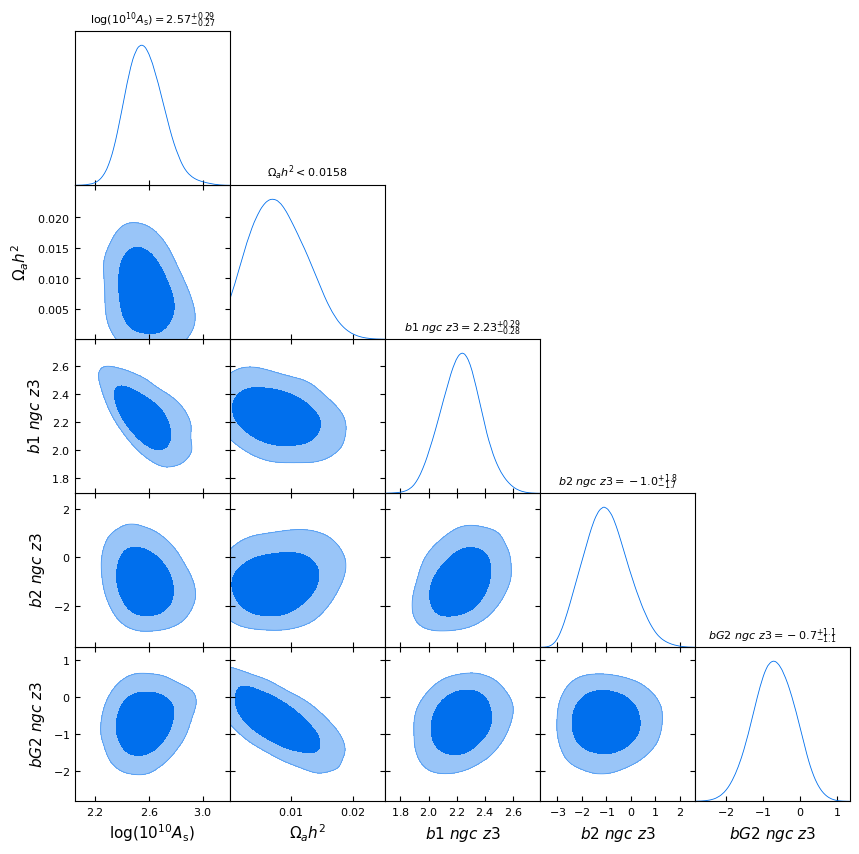

In [14]:

pars_toplot =['logA','omega_scf','b1_ngc_z3','b2_ngc_z3','bG2_ngc_z3']

gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot(chains_to_plot_boss[2] ,  pars_toplot, title_limit=2, filled=True)
# gdplot.finish_plot(no_tight=True)

In [16]:
for samp in chains_to_plot_boss:
    print(samp.label[5:],'-->', samp.getInlineLatex('omega_scf',limit=2))


m24 --> \Omega_{a} h^2 < 0.139
m25 --> \Omega_{a} h^2 < 0.0240
m26 --> \Omega_{a} h^2 < 0.0158
m27 --> \Omega_{a} h^2 < 0.00435
m28 --> \Omega_{a} h^2 < 0.00815


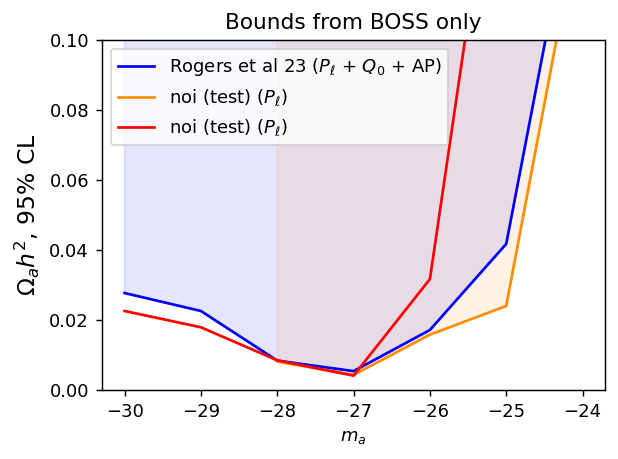

In [20]:
plt.figure(figsize=(5,3.5), dpi=130)
mvals = [-24, -25, -26, -27, -28,-29, -30]
RogersBOSS = [0.155,0.04174,0.01717,0.00542,0.00842,0.02259,0.02771]
plt.plot(mvals, RogersBOSS,'b', label=r'Rogers et al 23 ($P_\ell$ + $Q_0$ + AP)')
plt.fill_between(mvals, RogersBOSS, y2=0.16, interpolate=True, color='b', alpha=0.1)

# My bounds
my2lims = [samp.getMargeStats().parWithName('omega_scf').limits[1].upper for samp in chains_to_plot_boss]
mvals2 = [samp.ma_val for samp in chains_to_plot_boss] 

# my2lims_Pell = my2lims
plt.plot(mvals2, my2lims, 'darkorange',label='noi (test) ($P_\ell$)')
plt.fill_between(mvals2, my2lims, y2=0.16, interpolate=True, color='darkorange', alpha=0.1)

plt.plot(mvals, my2lims_Pell, 'r',label='noi (test) ($P_\ell$)')

plt.ylim([0.,0.1])
# plt.yscale('log')
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
plt.legend()
plt.title('Bounds from BOSS only')
plt.show()

In [56]:
from tabulate import tabulate
table = tabulate(list(zip(mvals,RogersPlanck, my2lims+[None,None,None])), headers=[r'$m_a$',r'Rogers Planck $\Omega_a h^2$ 95%CL',r'noi Planck'], floatfmt='.3g',tablefmt="latex_raw", rowalign='center')
print(table)

\begin{tabular}{rrr}
\hline
   $m_a$ &   Rogers Planck $\Omega_a h^2$ 95%CL &   noi Planck \\
\hline
     -24 &                              0.114   &      0.107   \\
     -25 &                              0.0967  &      0.0719  \\
     -26 &                              0.00615 &      0.00613 \\
     -27 &                              0.00344 &      0.00304 \\
     -28 &                              0.00163 &              \\
     -29 &                              0.00136 &              \\
     -30 &                              0.00145 &              \\
\hline
\end{tabular}


---
Compare with Rogers CMB

In [17]:
grid_root_dir = '/home/fverdian/cobaya/chains-ulysses/axigrid_cmb_only'
Samples={}
for root, dirs, files in os.walk(grid_root_dir):
    for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
        # if chain_name in ['base_m30']: continue
        print(chain_name)
        subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
        only_subdir = subdirs[0]
        subdir_path = os.path.join(root, chain_name, only_subdir)
        Samples[chain_name] = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
        Samples[chain_name].label = chain_name
        Samples[chain_name].ma_val = -int(chain_name[-2:])
        p=Samples[chain_name].getParams()
        Samples[chain_name].addDerived(p.omega_scf/(p.omega_cdm+p.omega_b+p.omega_scf), name='fx', label=r'f_\chi', range=[0.,None])
chains_to_plot_cmb=list(Samples.values())

base_m24
base_m25
base_m26
base_m27
base_m28
base_m29
base_m30


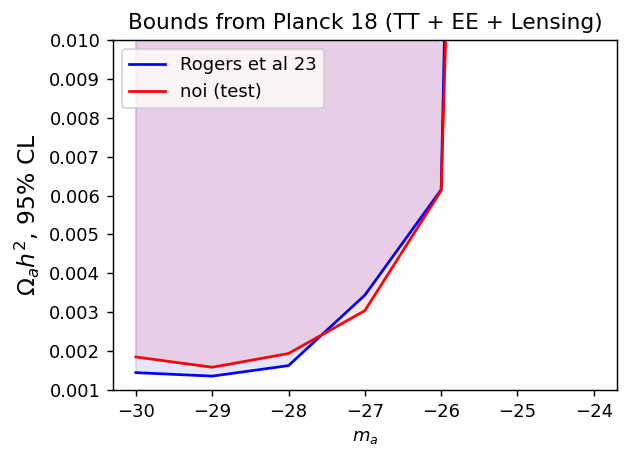

In [35]:
plt.figure(figsize=(5,3.5), dpi=130)
mvals = [-24, -25, -26, -27, -28,-29, -30]
RogersPlanck = [0.11399,0.09667,0.00615,0.00344,0.00163,0.00136,0.00145]
plt.plot(mvals, RogersPlanck,'b', label='Rogers et al 23')
plt.fill_between(mvals, RogersPlanck, y2=0.16, interpolate=True, color='b', alpha=0.1)

# My bounds
myOmalim_cmb = [samp.getMargeStats().parWithName('omega_scf').limits[1].upper for samp in chains_to_plot_cmb]

mymavals = np.array([samp.ma_val for samp in chains_to_plot_cmb])
plt.plot(mymavals, myOmalim_cmb, 'r',label='noi (test)')
plt.fill_between(mymavals, myOmalim_cmb, y2=0.2, interpolate=True, color='r', alpha=0.1)

plt.ylim([1.e-3,0.01])
# plt.yscale('log')
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
plt.legend()
plt.title('Bounds from Planck 18 (TT + EE + Lensing)')
plt.show()

---
view as $k_J$ vs $f_\chi$

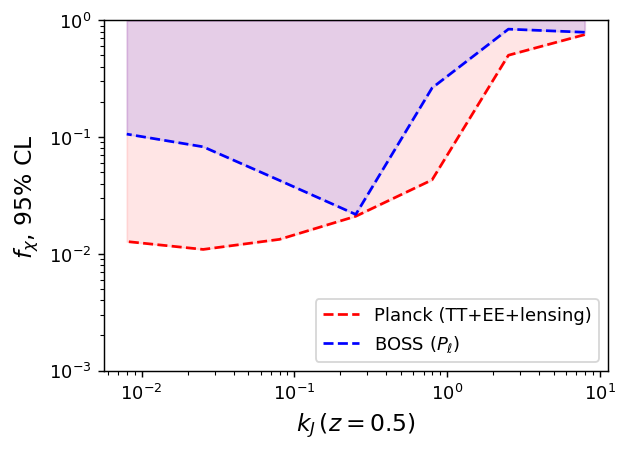

In [32]:
myhvals = np.array([samp.getMargeStats().parWithName('h').mean for samp in chains_to_plot_cmb])
mykJvals= np.sqrt(3.336e-04 * myhvals * pow(10.,(mymavals)) * 1.56e29)/myhvals * (0.6666)**0.25
myfxlim_cmb = [samp.getMargeStats().parWithName('fx').limits[1].upper for samp in chains_to_plot_cmb]
myfxlim_boss = [samp.getMargeStats().parWithName('fx').limits[1].upper for samp in chains_to_plot_boss]

plt.figure(figsize=(5,3.5), dpi=130)
plt.plot(mykJvals, myfxlim_cmb, 'r--',label='Planck (TT+EE+lensing)')
plt.fill_between(mykJvals, myfxlim_cmb, y2=1, interpolate=True, color='r', alpha=0.1)

plt.plot(mykJvals, myfxlim_boss, 'b--',label='BOSS ($P_\ell$)')
plt.fill_between(mykJvals, myfxlim_boss, y2=1, interpolate=True, color='b', alpha=0.1)

plt.ylim([1.e-3,1.])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k_J\,(z=0.5)$', fontsize=13)
plt.ylabel(r'$f_\chi$, 95% CL', fontsize=13)
plt.legend(loc='lower right')
plt.show()